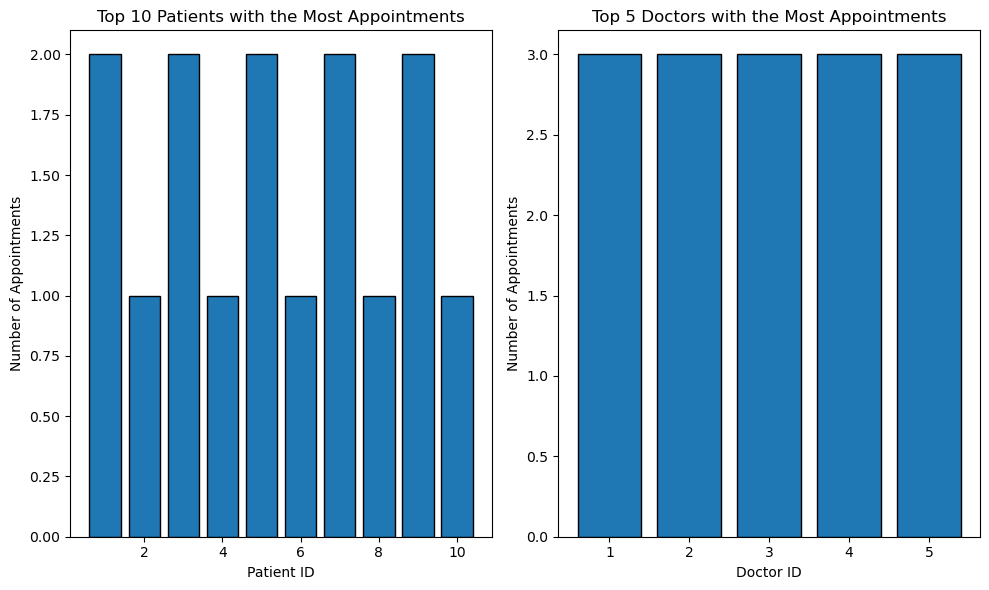

In [22]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="hospital_database",
    user="postgres",
    password="czy490603"
)

cursor = conn.cursor()

query_top_patients = """
SELECT PatientID, COUNT(*) AS AppointmentCount
FROM Appointments
GROUP BY PatientID
ORDER BY AppointmentCount DESC
LIMIT 10
"""

query_top_doctors = """
SELECT DoctorID, COUNT(*) AS AppointmentCount
FROM Appointments
GROUP BY DoctorID
ORDER BY AppointmentCount DESC
LIMIT 5
"""

cursor.execute(query_top_patients)
top_patients = cursor.fetchall()

cursor.execute(query_top_doctors)
top_doctors = cursor.fetchall()

cursor.close()
conn.close()

df_top_patients = pd.DataFrame(top_patients, columns=['PatientID', 'AppointmentCount'])
df_top_doctors = pd.DataFrame(top_doctors, columns=['DoctorID', 'AppointmentCount'])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(df_top_patients['PatientID'], df_top_patients['AppointmentCount'], edgecolor='black')
plt.title('Top 10 Patients with the Most Appointments')
plt.xlabel('Patient ID')
plt.ylabel('Number of Appointments')

plt.subplot(1, 2, 2)
plt.bar(df_top_doctors['DoctorID'], df_top_doctors['AppointmentCount'], edgecolor='black')
plt.title('Top 5 Doctors with the Most Appointments')
plt.xlabel('Doctor ID')
plt.ylabel('Number of Appointments')

plt.tight_layout()
plt.show()


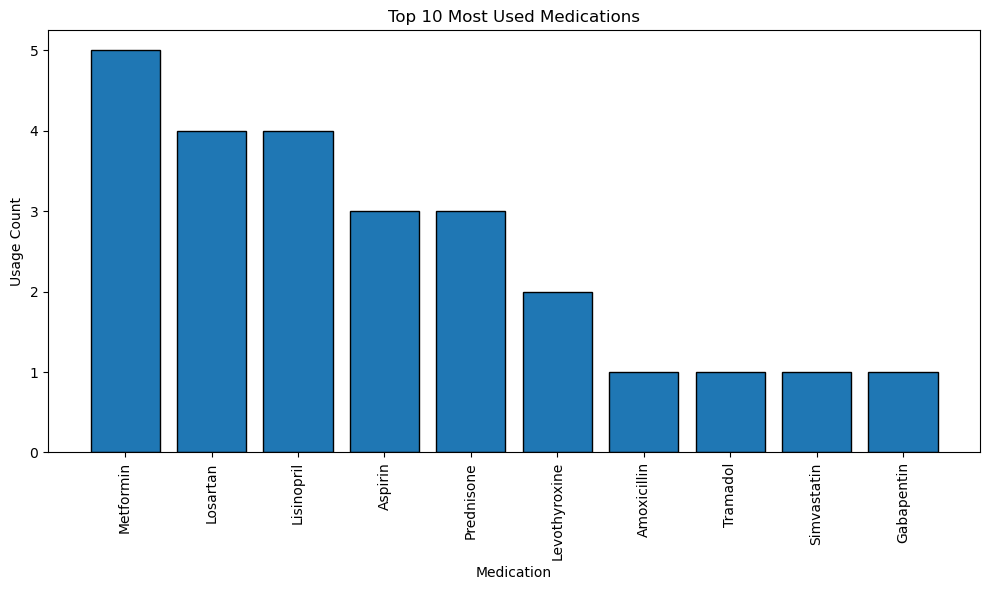

In [6]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="hospital_database",
    user="postgres",
    password="czy490603"
)

cursor = conn.cursor()

# Execute a query to get the number of times each drug was used
query = """
SELECT MedicationID, COUNT(*) AS UsageCount
FROM Prescriptions
GROUP BY MedicationID
ORDER BY UsageCount DESC
LIMIT 10
"""

cursor.execute(query)
medication_usage = cursor.fetchall()

cursor.close()
conn.close()

df_medication_usage = pd.DataFrame(medication_usage, columns=['MedicationID', 'UsageCount'])

conn = psycopg2.connect(
    host="localhost",
    database="hospital_database",
    user="postgres",
    password="czy490603"
)

cursor = conn.cursor()

# Get the name of the drug
medication_names = []
for medication_id in df_medication_usage['MedicationID']:
    query = f'SELECT MedicationName FROM Medications WHERE MedicationID = {medication_id}'
    cursor.execute(query)
    medication_name = cursor.fetchone()[0]
    medication_names.append(medication_name)

cursor.close()
conn.close()

df_medication_usage['MedicationName'] = medication_names

# Bar graphs of drug use counts
plt.figure(figsize=(10, 6))
plt.bar(df_medication_usage['MedicationName'], df_medication_usage['UsageCount'], edgecolor='black')
plt.title('Top 10 Most Used Medications')
plt.xlabel('Medication')
plt.ylabel('Usage Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


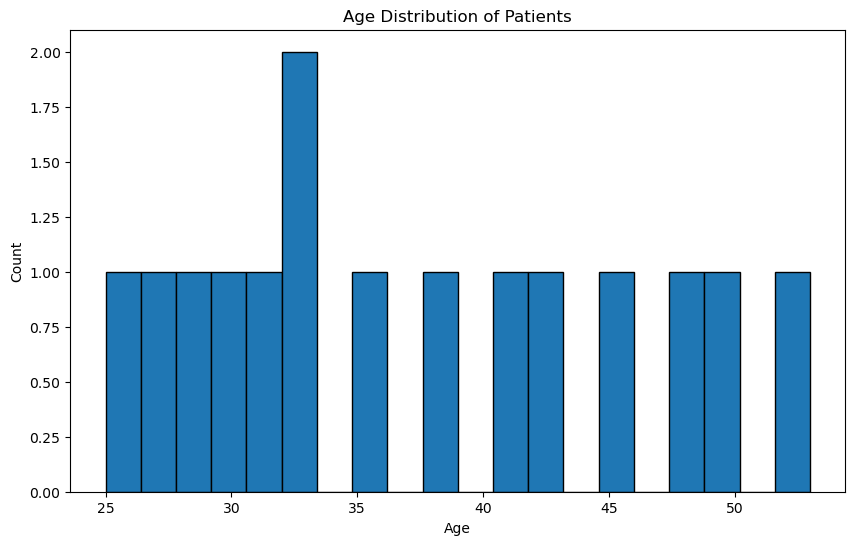

In [8]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="hospital_database",
    user="postgres",
    password="czy490603"
)

cursor = conn.cursor()

# Execute a query to get the patient's date of birth
query_patients = """
SELECT DateOfBirth
FROM Patients
"""

cursor.execute(query_patients)
patient_birthdates = cursor.fetchall()

cursor.close()
conn.close()

df_patients = pd.DataFrame(patient_birthdates, columns=['DateOfBirth'])

# Calculation of the patient's age
current_year = pd.Timestamp.now().year
df_patients['Age'] = current_year - pd.to_datetime(df_patients['DateOfBirth']).dt.year

plt.figure(figsize=(10, 6))
plt.hist(df_patients['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


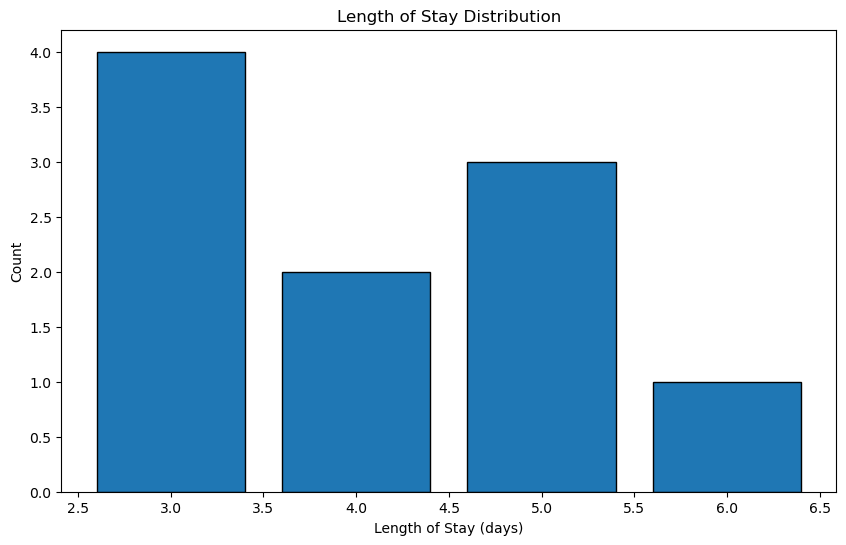

In [13]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="hospital_database",
    user="postgres",
    password="czy490603"
)

cursor = conn.cursor()

# Execute a query to get the admission date and discharge date of the hospital record
query_admissions = """
SELECT AdmissionDate, DischargeDate
FROM Admissions
"""

cursor.execute(query_admissions)
admission_dates = cursor.fetchall()

cursor.close()
conn.close()

df_admissions = pd.DataFrame(admission_dates, columns=['AdmissionDate', 'DischargeDate'])

# Calculating the number of days in hospital
df_admissions['LengthOfStay'] = (df_admissions['DischargeDate'] - df_admissions['AdmissionDate']).dt.days

# Distribution of statistical hospital days
stay_counts = df_admissions['LengthOfStay'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(stay_counts.index, stay_counts.values, edgecolor='black')
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')
plt.show()


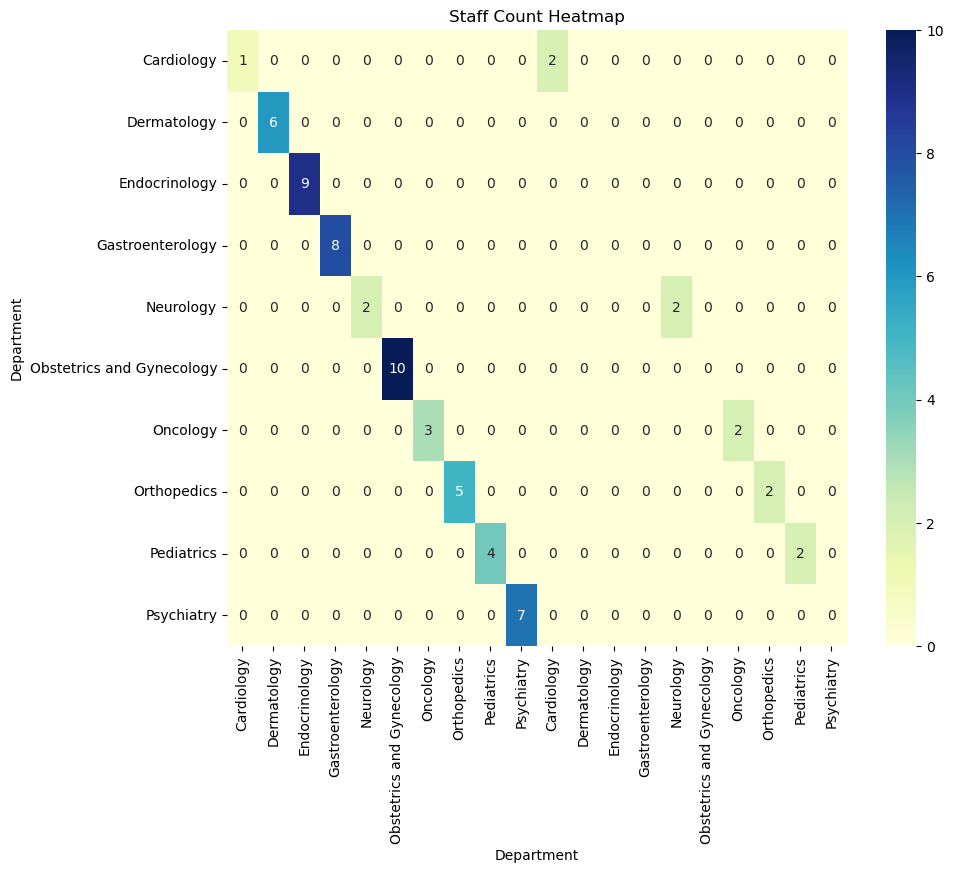

In [19]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="hospital_database",
    user="postgres",
    password="czy490603"
)

cursor = conn.cursor()

# Execute queries to obtain section data
query_departments = """
SELECT DepartmentID, DepartmentName
FROM Departments
"""

cursor.execute(query_departments)
departments = cursor.fetchall()

# Execute queries to obtain staff data
query_staff = """
SELECT DepartmentID, COUNT(*) AS StaffCount
FROM Staff
GROUP BY DepartmentID
"""

cursor.execute(query_staff)
staff_data = cursor.fetchall()

cursor.close()
conn.close()

df_departments = pd.DataFrame(departments, columns=['DepartmentID', 'DepartmentName'])
df_staff = pd.DataFrame(staff_data, columns=['DepartmentID', 'StaffCount'])

# Consolidation of section and staff data
df_merged = pd.merge(df_departments, df_staff, on='DepartmentID', how='left')

heatmap_data = pd.pivot_table(df_merged, values='StaffCount', index='DepartmentName', columns='DepartmentName', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Staff Count Heatmap')
plt.xlabel('Department')
plt.ylabel('Department')
plt.show()


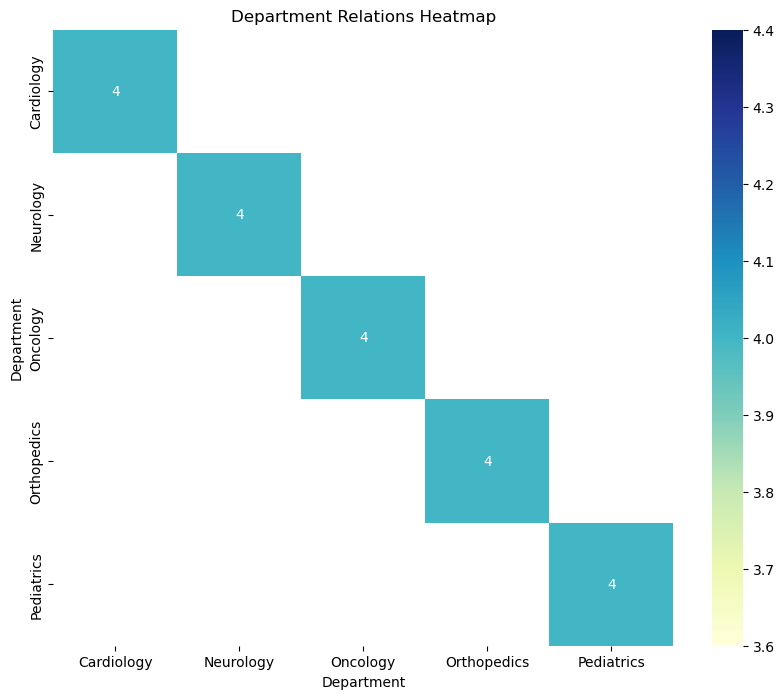

In [26]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="hospital_database",
    user="postgres",
    password="czy490603"
)


cursor = conn.cursor()


query_departments = """
SELECT DepartmentName
FROM Departments
"""

cursor.execute(query_departments)
departments = cursor.fetchall()


query_department_relations = """
SELECT DepartmentName1, DepartmentName2, COUNT(*) AS RelationCount
FROM (
    SELECT Departments.DepartmentName AS DepartmentName1, Staff.DepartmentID AS DepartmentID
    FROM Staff
    LEFT JOIN Departments ON Staff.DepartmentID = Departments.DepartmentID
) AS T1
JOIN (
    SELECT Departments.DepartmentName AS DepartmentName2, Staff.DepartmentID AS DepartmentID
    FROM Staff
    LEFT JOIN Departments ON Staff.DepartmentID = Departments.DepartmentID
) AS T2
ON T1.DepartmentID = T2.DepartmentID
GROUP BY DepartmentName1, DepartmentName2
"""

cursor.execute(query_department_relations)
department_relations = cursor.fetchall()


cursor.close()
conn.close()


df_departments = pd.DataFrame(departments, columns=['DepartmentName'])
df_relations = pd.DataFrame(department_relations, columns=['DepartmentName1', 'DepartmentName2', 'RelationCount'])


df_relation_matrix = df_relations.pivot(index='DepartmentName1', columns='DepartmentName2', values='RelationCount')


plt.figure(figsize=(10, 8))
sns.heatmap(df_relation_matrix, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Department Relations Heatmap')
plt.xlabel('Department')
plt.ylabel('Department')
plt.show()
